In [34]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.chdir("C:\\Users\\Ganesh\\RandPython")
from sklearn.datasets import make_classification, make_blobs

from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


In [80]:
# Setting return-X_y=True returns the features and the target variable
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [19]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

In [20]:
clf = LogisticRegression().fit(X_train, y_train)

In [31]:
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


In [35]:
y_predicted=clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

In [36]:
confusion

array([[52,  1],
       [ 5, 85]])

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN) (All positives/(All))
# Precision = TP / (TP + FP) Ratio of True of positives among all positives
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate  (True positive)/()
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predicted)))

Accuracy: 0.96
Precision: 0.99
Recall: 0.94
F1: 0.97


In [83]:
y_cancer=y_cancer.reshape(569L,1L)
cancer=np.append(X_cancer,y_cancer,axis=1)
np.savetxt("cancer.csv", cancer, delimiter=",")

In [84]:
cancer.shape

(569L, 31L)

In [95]:
df =pd.read_csv("adult1.csv",encoding="ISO-8859-1",na_values=[""," "," ?"])

In [125]:
df1=df.dropna()
print(df1.shape)
adult = df1[['age','occupation','education','educationNum','capitalGain','capital-loss', 
             'hours-per-week','native-country','salary']]

X=adult[['age','occupation','education','educationNum','capitalGain','capital-loss', 
             'hours-per-week','native-country']]
X_adult=pd.get_dummies(X,columns=['occupation','education','native-country'])
y=adult['salary']

X_adult_train, X_adult_test, y_train, y_test = train_test_split(X_adult, y,
                                                   random_state = 0)

(30161, 16)


In [130]:
type(y_train[0])

numpy.int64

In [137]:
clf = LogisticRegression().fit(X_adult_train, y_train)


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_adult_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_adult_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.81


In [138]:
y_predicted=clf.predict(X_adult_test)
confusion = confusion_matrix(y_test, y_predicted)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predicted)))

Accuracy: 0.81
Precision: 0.68
Recall: 0.41
F1: 0.51


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_adult_train)
# Apply scaling to test set also
X_test_scaled = scaler.transform(X_adult_test)

In [141]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))


Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.79


In [142]:
accuracy=[]
neighbors=[1,3,5,10,15]
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    accuracy.append(knn.score(X_test_scaled, y_test))
    print('Accuracy test score: {:.3f}'
        .format(knn.score(X_test_scaled, y_test)))

Accuracy test score: 0.749
Accuracy test score: 0.779
Accuracy test score: 0.793
Accuracy test score: 0.804
Accuracy test score: 0.803


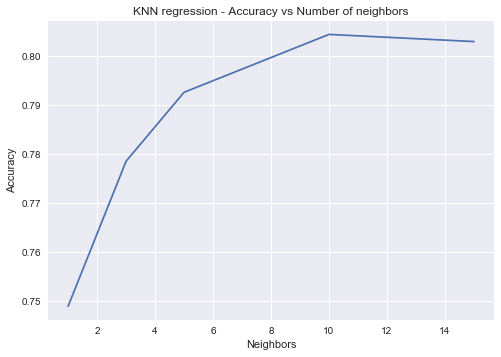

In [145]:
fig=plt.plot(neighbors,accuracy)
fig=plt.title("KNN regression - Accuracy vs Number of neighbors")
fig=plt.xlabel("Neighbors")
fig=plt.ylabel("Accuracy")
plt.show()